In [56]:
import numpy as np 
import torch
import matplotlib.pyplot as plt

In [103]:
#@title Visualization code

def image_grid(x):
  size = 32
  channels = 3
  img = x.reshape(-1, size, size, channels)
  w = int(np.sqrt(img.shape[0]))
  img = img.reshape((w, w, size, size, channels)).transpose((0, 2, 1, 3, 4)).reshape((w * size, w * size, channels))
  return img

def show_samples(x, s=10):
  x = x.permute(0, 2, 3, 1).detach().cpu().numpy()
  img = image_grid(x)
  plt.figure(figsize=(s,s))
  plt.axis('off')
  plt.imshow(img)
  plt.show()


In [157]:
all_images[:121].shape

(121, 3, 32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23


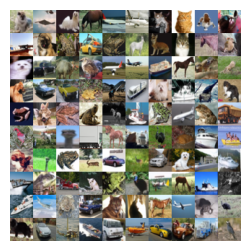

In [168]:
gpu_ids = ['19', '20', '21', '28', '29', '30']
gpu_ids = ['23']
gpu_names = ['gpu'+n for n in gpu_ids]

data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/' + gpu_ids[0] + '_samples.npz')
all_images = data['x']
print(gpu_ids[0])
show_samples(torch.tensor(all_images),3)

for number in gpu_ids[1:]:
    path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/' + number + '_samples.npz'
    print(number)
    data = np.load(path)
    images = data['x']
    print(images.reshape(-1).std())
    show_samples(torch.tensor(images) ,3)
    all_images = np.concatenate((all_images, images), 0)


In [170]:
np.sqrt(600)

24.49489742783178

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


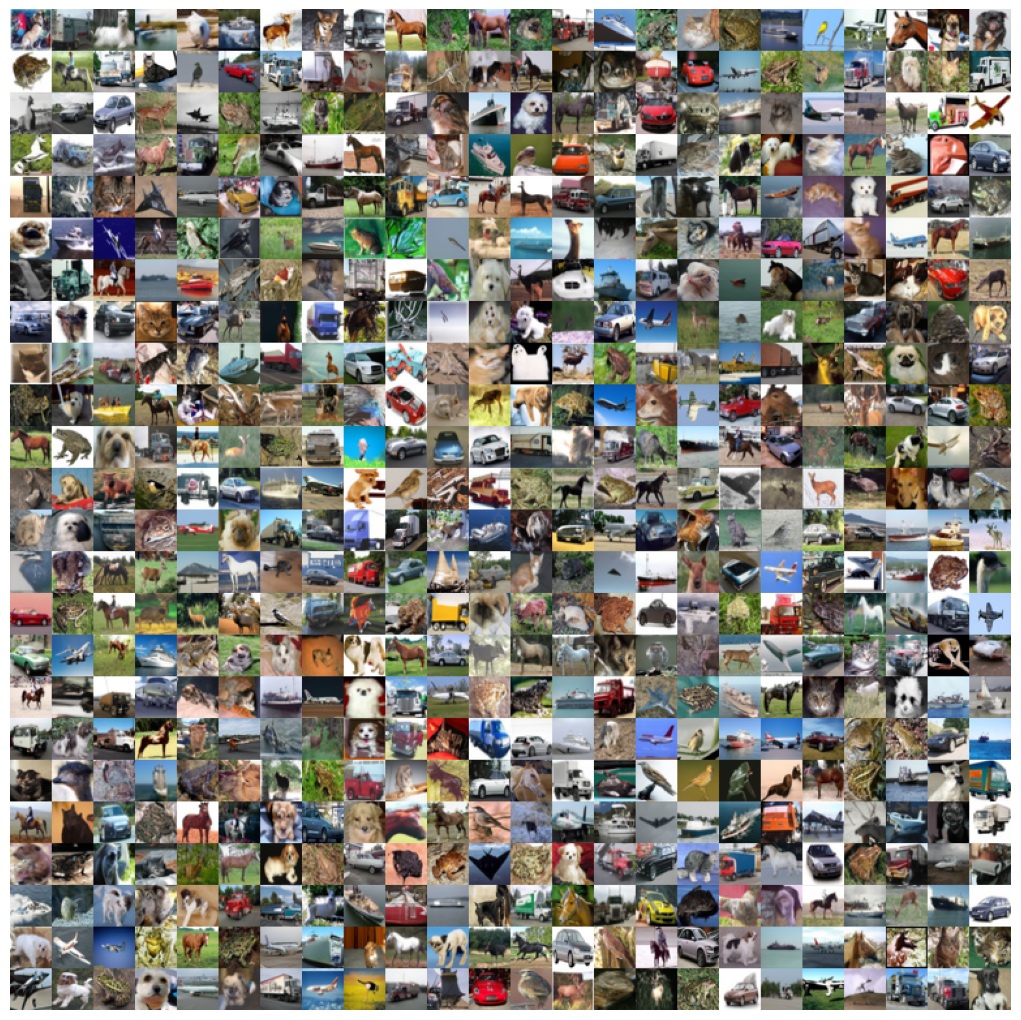

In [171]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_600.npz')
all_images = data['x']
show_samples(torch.tensor(all_images[:24**2, :, :, :]), 13)